In [1]:
import pandas as pd

df = pd.read_csv("enhanced_first_dataset.csv")

# 1. Expansion Signals (Sales/GTM roles)
sales_roles = df[df['department'].isin(['Sales', 'Other']) & (df['Go-To-Market Expansion'] == 1)]
print("Companies scaling GTM:\n", sales_roles['company_name'].value_counts())

Companies scaling GTM:
 company_name
Kala.ai           10
Razorpay           5
Plum Insurance     4
Yellow.ai          4
Meesho             3
BrowserStack       2
Name: count, dtype: int64


In [2]:
# 2. Product Indicators (PM/Design hires)
product_roles = df[(df['department'] == 'Product') & (df['New Product Initiative'] == 1)]
print("\nProduct hiring trends:\n", product_roles.groupby('company_name')['Job_Title'].count())


Product hiring trends:
 company_name
BrowserStack      3
Chargebee         1
Graphy            1
Kala.ai           1
Meesho            7
Plum Insurance    4
Razorpay          4
Name: Job_Title, dtype: int64


In [3]:
# 3. Global Focus (Non-India locations)
global_roles = df[~df['location'].str.contains("India")]
print("\nGlobal roles by company:\n", global_roles['company_name'].value_counts())


Global roles by company:
 company_name
Kala.ai      50
Yellow.ai    44
Name: count, dtype: int64


In [4]:
# 4. Leadership Hiring (VP/Director/Lead titles)
leadership = df[df['seniority'].isin(['Lead', 'Senior', 'Director', 'VP'])]
print("\nLeadership hires:\n", leadership['company_name'].value_counts())


Leadership hires:
 company_name
Plum Insurance    17
Razorpay          16
Chargebee         13
BrowserStack      12
Graphy            11
Yellow.ai          8
Kala.ai            7
Meesho             2
Name: count, dtype: int64


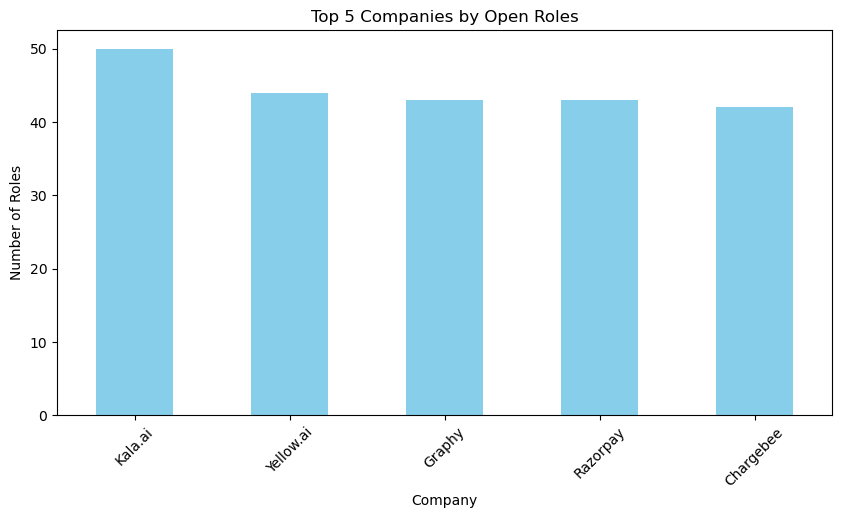

In [ ]:
import matplotlib.pyplot as plt

role_counts = df['company_name'].value_counts().head(5)

plt.figure(figsize=(10, 5))
role_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Companies by Open Roles')
plt.xlabel('Company')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45)
plt.show()

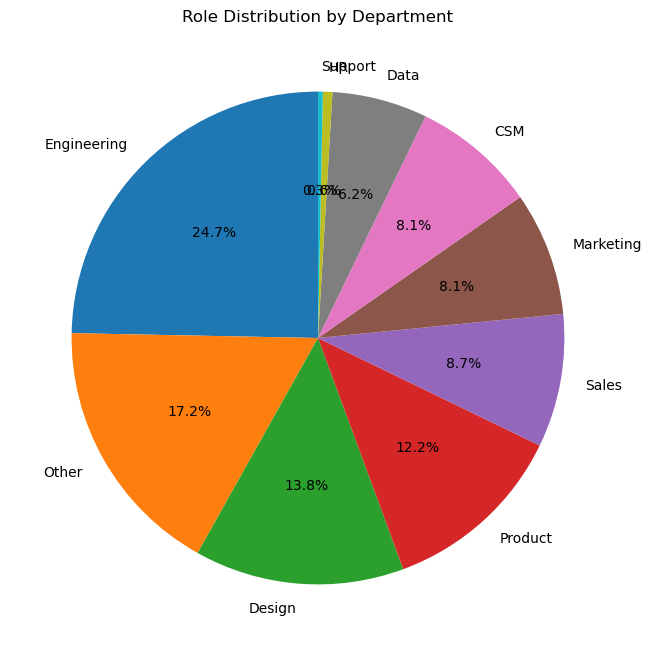

In [ ]:
dept_counts = df['department'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Role Distribution by Department')
plt.show()

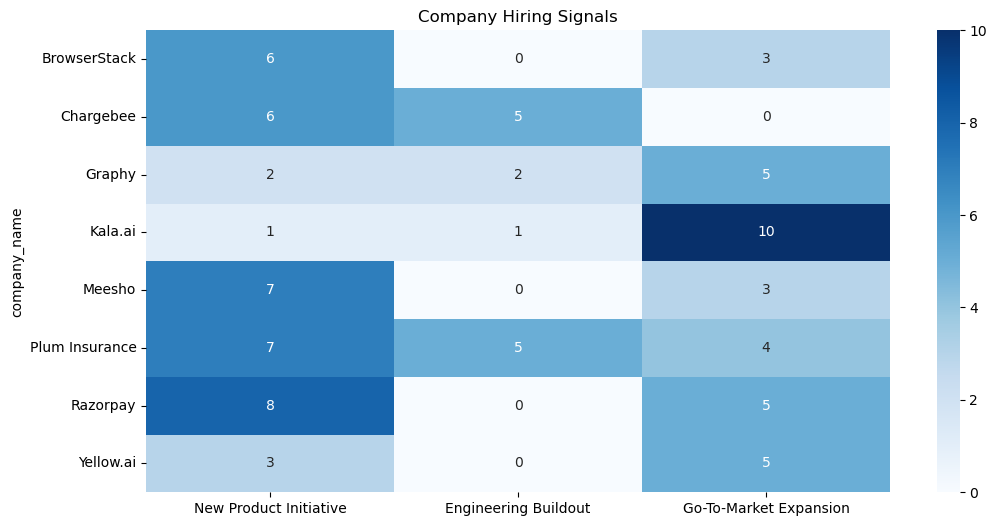

In [9]:
import seaborn as sns
signals = df.groupby('company_name')[['New Product Initiative', 'Engineering Buildout', 'Go-To-Market Expansion']].sum()
plt.figure(figsize=(12, 6))
sns.heatmap(signals, annot=True, cmap='Blues', fmt='g')
plt.title('Company Hiring Signals')
plt.show()